# **Task 2 - Diminos Case Study**

In [1]:
# Load & Inspect Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [2]:
# Convert Columns to DateTime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [3]:
# Calculate Delivery Time (IN MINUTES)
df['Delivery_Time'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60
df.head()

,order_id,order_placed_at,order_delivered_at,Delivery_Time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [4]:
# Basic Validation
df[['Delivery_Time']].describe()

,Delivery_Time
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


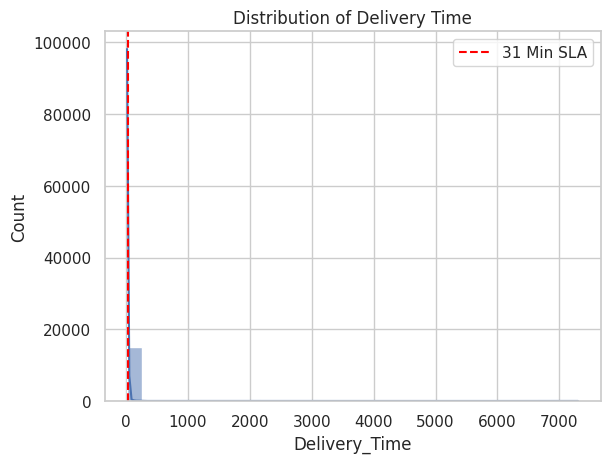

In [5]:
# Distribution of Delivery Time
plt.figure()
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.axvline(31, color='red', linestyle='--', label='31 Min SLA')
plt.title("Distribution of Delivery Time")
plt.legend()
plt.show()

In [6]:
# 95th Percentile (MOST IMPORTANT METRIC)
p95 = np.percentile(df['Delivery_Time'], 95)
p95

np.float64(27.261043996666658)

In [7]:
# SLA Breach Analysis
df['SLA_Breached'] = df['Delivery_Time'] > 31
df['SLA_Breached'].value_counts(normalize=True) * 100

,proportion
SLA_Breached,
False,96.286667
True,3.713333


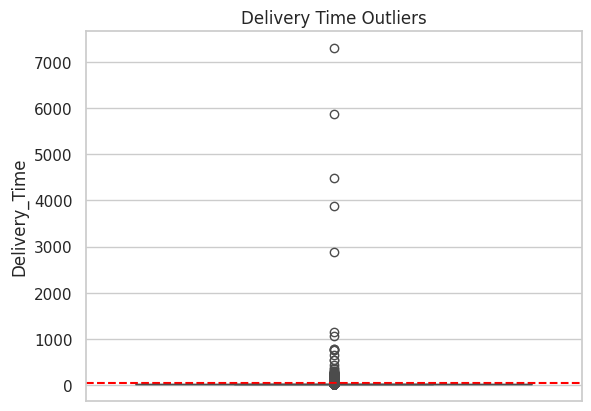

In [8]:
# Boxplot – Outlier Detection
plt.figure()
sns.boxplot(y=df['Delivery_Time'])
plt.axhline(31, color='red', linestyle='--')
plt.title("Delivery Time Outliers")
plt.show()

In [9]:
# Worst Delay Cases
df.sort_values('Delivery_Time', ascending=False).head(10)

,order_id,order_placed_at,order_delivered_at,Delivery_Time,SLA_Breached
5499,1528610,2023-03-10 17:06:22,2023-03-15 18:46:11.882496,7299.831375,True
4165,1527276,2023-03-08 09:46:43,2023-03-12 11:34:09.085175,5867.434753,True
10225,1533336,2023-03-19 11:07:32,2023-03-22 13:53:25.472592,4485.891210,True
14155,1537266,2023-03-26 09:54:24,2023-03-29 02:42:50.645252,3888.444088,True
10007,1533118,2023-03-19 00:56:34,2023-03-21 00:59:41.454974,2883.124250,True
11944,1535055,2023-03-22 12:50:53,2023-03-23 08:03:40.654492,1152.794242,True
1361,1524472,2023-03-03 10:04:13,2023-03-04 03:51:02.368715,1066.822812,True
5109,1528220,2023-03-10 01:04:58,2023-03-10 14:13:37.181329,788.653022,True
117,1523228,2023-03-01 04:59:04,2023-03-01 18:06:52.046891,787.800782,True
1910,1525021,2023-03-04 10:41:17,2023-03-04 23:20:15.509579,758.975160,True


In [10]:
# Summary Metrics
avg_time = df['Delivery_Time'].mean()
median_time = df['Delivery_Time'].median()
max_time = df['Delivery_Time'].max()

avg_time, median_time, max_time

(np.float64(20.499389326467778), 15.797986066666667, 7299.831374933333)